Archivos disponibles:
0: Data_20251021_1028_0001.h5
1: Data_20251021_1016_0001.h5
2: Data_20251021_1037_0001.h5
3: Data_20250926_1452_0001.h5
4: 0001_Data_29082025_1707.h5
5: Data_20251020_1724_0001.h5
6: Data_20251008_1056_0001.h5
7: Data_20251020_1748_0001.h5
8: Data_20251020_1727_0001.h5
9: Data_20251020_1746_0001.h5


Selecciona el número de archivo a abrir:  0



=== METADATA ===
Adq_window_time      : -1
channels             : [1 2 3 4]
decimation           : 1
num_events           : 10
samples_delay        : 8
samples_per_event    : 32
sampling_rate        : 125000000.0
set_time             : 1761053321731959040
sys_time             : 1761053323437395200
trigger_delay        : 0
trigger_level        : 0.1

El archivo contiene 10 eventos.



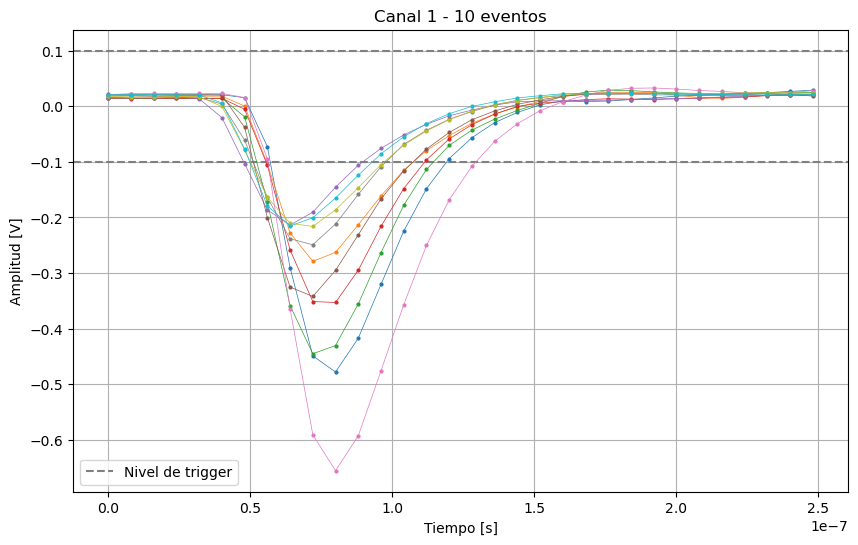

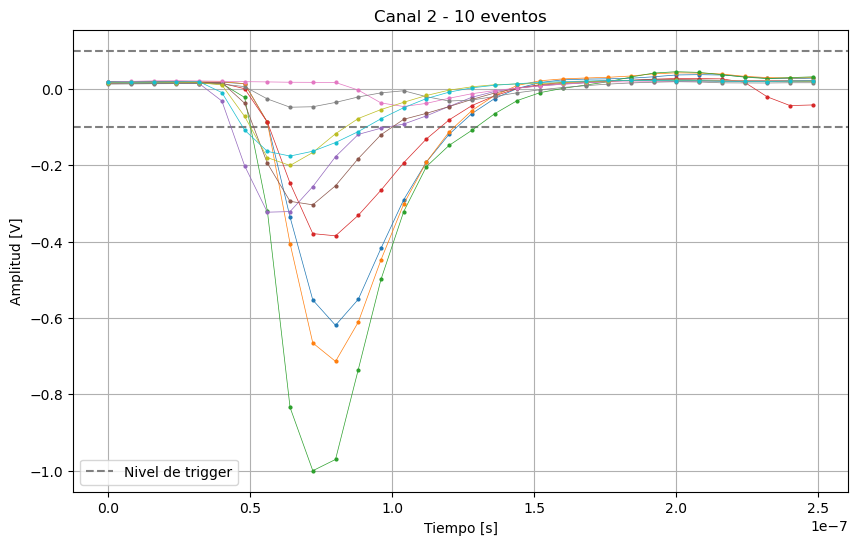

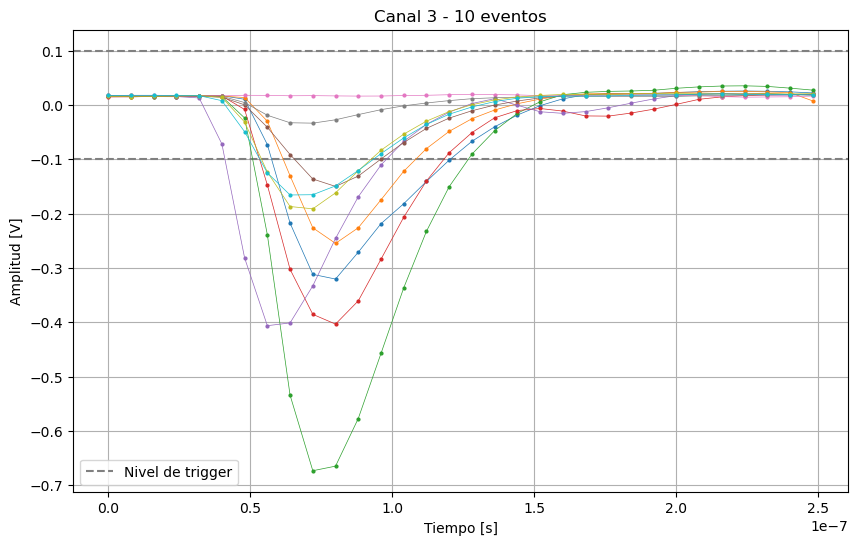

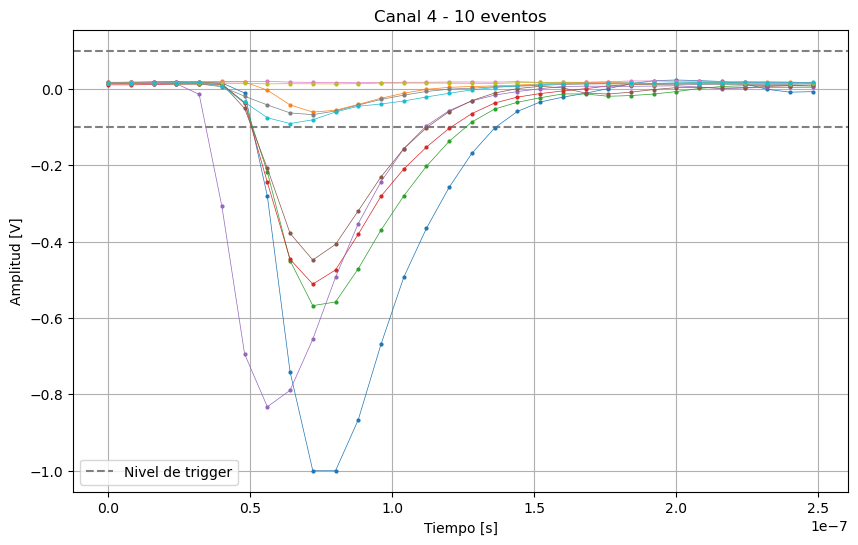

In [7]:
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt

# === 1. Listar archivos .h5 en el directorio actual ===
h5_files = [f for f in os.listdir('.') if f.endswith('.h5')]
if not h5_files:
    raise FileNotFoundError("No se encontraron archivos .h5 en el directorio actual.")

print("Archivos disponibles:")
for i, fname in enumerate(h5_files):
    print(f"{i}: {fname}")

# Seleccionar archivo
idx = int(input("Selecciona el número de archivo a abrir: "))
filename = h5_files[idx]

# === 2. Abrir archivo y mostrar metadata ===
with h5py.File(filename, "r") as f:
    print("\n=== METADATA ===")
    for k, v in f.attrs.items():
        print(f"{k:20s} : {v}")

    # Recuperar datos relevantes
    fs = f.attrs['sampling_rate']
    samples = f.attrs['samples_per_event']
    trig_lvl = f.attrs['trigger_level']
    channels = f.attrs['channels']

    # Eje de tiempo
    dt = 1 / fs
    time_axis = np.linspace(0, (samples - 1) * dt, samples)

    # === 3. Recorrer todos los eventos y graficar ===
    events = sorted([key for key in f.keys() if key.startswith('event_')])
    print(f"\nEl archivo contiene {len(events)} eventos.\n")

    for ch in channels:
        plt.figure(figsize=(10, 6))
        plt.title(f"Canal {ch} - {len(events)} eventos")
        plt.xlabel("Tiempo [s]")
        plt.ylabel("Amplitud [V]")

        # Línea horizontal para el trigger
        plt.axhline(y=trig_lvl, color='gray', linestyle='--', label='Nivel de trigger')
        plt.axhline(y=-trig_lvl, color='gray', linestyle='--')

        for ev in events:
            data = f[f"{ev}/channel_{ch}"][:]
            plt.plot(time_axis, data, marker='o', markersize=2, linewidth=0.5)

        plt.legend()
        plt.grid(True)
        plt.show()


In [ ]:
0
